In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [57]:
train = pd.read_csv('train__updated.csv')

In [58]:
train.head()

,index,year,month,day,hour,latitude,longitude,imma_version,attm_count,time_indicator,...,platform_type,dup_status,dup_check,nightday_flag,source_exclusion_flags,release_no_primary,release_no_secondary,release_no_tertiary,release_status_indicator,intermediate_reject_flag
0,train_0,1978,1,1,0.0,48.8,-126.0,1,4,NaN,...,6.0,1,2.0,2,NaN,3,0,1,0,1
1,train_1,1978,1,1,0.0,49.7,-127.9,1,4,NaN,...,6.0,1,2.0,2,NaN,3,0,1,0,1
2,train_2,1978,1,1,0.0,50.9,-129.9,1,4,NaN,...,6.0,1,2.0,2,NaN,3,0,1,0,1
3,train_3,1978,1,1,0.0,51.4,-128.8,1,4,NaN,...,6.0,1,2.0,2,NaN,3,0,1,0,1
4,train_4,1978,1,1,0.0,49.3,-123.7,1,4,NaN,...,6.0,1,2.0,2,NaN,3,0,1,0,1


In [31]:
train.mean()

year                         1978.000000
month                           3.025800
day                            15.541780
hour                           11.772997
latitude                       49.424582
longitude                    -126.009626
imma_version                    1.000000
attm_count                      4.000000
time_indicator                  0.000040
latlong_indicator               0.000000
ship_course                     0.107460
ship_speed                      0.074160
national_source_indicator       0.002020
id_indicator                    2.949860
wind_direction_indicator        0.000000
wind_direction_true           183.243600
wind_speed_indicator            1.071800
wind_speed                      6.378082
visibility                      2.377140
present_weather                 0.193520
past_weather                    0.039520
sea_level_pressure           1011.643934
characteristic_of_ppp           3.348700
amt_pressure_tend               0.965720
indicator_for_te

In [6]:
train.wave_height

0        350.0
1        400.0
2        550.0
3        400.0
4         50.0
5        300.0
6         50.0
7         50.0
8        450.0
9        250.0
10       200.0
11        50.0
12       150.0
13       250.0
14        50.0
15       200.0
16       450.0
17        50.0
18        50.0
19       400.0
20       350.0
21        50.0
22       300.0
23       200.0
24       150.0
25       200.0
26       200.0
27       400.0
28        50.0
29        50.0
         ...  
49970    100.0
49971     50.0
49972     50.0
49973    100.0
49974     50.0
49975    100.0
49976     50.0
49977     50.0
49978    100.0
49979     50.0
49980      0.0
49981    100.0
49982     50.0
49983     50.0
49984     50.0
49985     50.0
49986    100.0
49987    100.0
49988     50.0
49989     50.0
49990    100.0
49991      0.0
49992     50.0
49993     50.0
49994    100.0
49995     50.0
49996    100.0
49997     50.0
49998     50.0
49999     50.0
Name: wave_height, Length: 50000, dtype: float64

In [59]:
train = train.fillna(train.median())

In [60]:
train.columns

Index(['index', 'year', 'month', 'day', 'hour', 'latitude', 'longitude',
       'imma_version', 'attm_count', 'time_indicator', 'latlong_indicator',
       'ship_course', 'ship_speed', 'national_source_indicator',
       'id_indicator', 'wind_direction_indicator', 'wind_direction_true',
       'wind_speed_indicator', 'wind_speed', 'visibility', 'present_weather',
       'past_weather', 'sea_level_pressure', 'characteristic_of_ppp',
       'amt_pressure_tend', 'indicator_for_temp', 'air_temperature',
       'wbt_indicator', 'wetbulb_temperature', 'dpt_indicator',
       'dewpoint_temperature', 'sst_measurement_method', 'sea_surface_temp',
       'total_cloud_amount', 'lower_cloud_amount', 'wave_period',
       'wave_height', 'swell_direction', 'swell_period', 'swell_height',
       'ten_degree_box_number', 'one_degree_box_number', 'deck', 'source_id',
       'platform_type', 'dup_status', 'dup_check', 'nightday_flag',
       'source_exclusion_flags', 'release_no_primary', 'release_no_se

In [61]:
test = pd.read_csv('test__updated.csv')

In [62]:
test = test.fillna(test.median())

In [63]:
test.head()

,index,year,month,day,hour,latitude,longitude,imma_version,attm_count,time_indicator,...,platform_type,dup_status,dup_check,nightday_flag,source_exclusion_flags,release_no_primary,release_no_secondary,release_no_tertiary,release_status_indicator,intermediate_reject_flag
0,test_50000,1978,5,30,4.83,48.3,-123.2,1,4,0.0,...,6.0,1,2.0,1,NaN,3,0,1,0,1
1,test_50001,1978,5,30,5.00,49.3,-123.7,1,4,0.0,...,6.0,1,2.0,1,NaN,3,0,1,0,1
2,test_50002,1978,5,30,5.00,49.9,-125.0,1,4,0.0,...,6.0,1,2.0,1,NaN,3,0,1,0,1
3,test_50003,1978,5,30,5.00,53.8,-128.8,1,4,0.0,...,6.0,1,2.0,1,NaN,3,0,1,0,1
4,test_50004,1978,5,30,5.00,46.9,-125.0,1,4,0.0,...,6.0,1,2.0,1,NaN,3,0,1,0,1


In [35]:
x= train[cols]

In [34]:
cols

['sea_surface_temp',
 'wetbulb_temperature',
 'present_weather',
 'swell_height',
 'one_degree_box_number',
 'sea_level_pressure',
 'lower_cloud_amount',
 'swell_period',
 'dewpoint_temperature',
 'ship_speed',
 'air_temperature',
 'wave_period',
 'wind_speed',
 'visibility',
 'wind_direction_true',
 'total_cloud_amount',
 'swell_direction',
 'longitude',
 'amt_pressure_tend',
 'characteristic_of_ppp',
 'past_weather',
 'latitude']

In [36]:
y = train['wave_height']

In [64]:
cols = ['year', 'month', 'day', 'hour', 'latitude', 'longitude',
       'imma_version', 'attm_count', 'time_indicator', 'latlong_indicator',
       'ship_course', 'ship_speed', 'national_source_indicator',
       'id_indicator', 'wind_direction_indicator', 'wind_direction_true',
       'wind_speed_indicator', 'wind_speed', 'visibility', 'present_weather',
       'past_weather', 'sea_level_pressure', 'characteristic_of_ppp',
       'amt_pressure_tend', 'indicator_for_temp', 'air_temperature',
       'wbt_indicator', 'wetbulb_temperature', 'dpt_indicator',
       'dewpoint_temperature', 'sst_measurement_method', 'sea_surface_temp',
       'total_cloud_amount', 'lower_cloud_amount', 'wave_period', 'swell_direction', 'swell_period', 'swell_height',
       'ten_degree_box_number', 'one_degree_box_number', 'deck', 'source_id',
       'platform_type', 'dup_status', 'dup_check', 'nightday_flag',
       'source_exclusion_flags', 'release_no_primary', 'release_no_secondary',
       'release_no_tertiary', 'release_status_indicator',
       'intermediate_reject_flag']

In [65]:
len(cols)

52

In [38]:
x_test = test[cols]

In [41]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [48]:
xgb = XGBRegressor(max_depth=5)
scores = cross_val_score(xgb, x, y,scoring='neg_mean_squared_error', cv=5)

In [47]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [23]:
loo = cross_validation.LeaveOneOut(len(y))
scores = cross_validation.cross_val_score(xgb, x,y, scoring='mean_squared_error', cv=loo,)

C:\Users\ASUS\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ASUS\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ASUS\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a

KeyboardInterrupt: 

In [49]:
scores.mean()

-3470.4717952097612

In [51]:
xgb.fit(x,y)
pred = xgb.predict(x_test)

In [52]:
sub = pd.read_csv('sample_sub.csv')

In [53]:
sub.columns

Index(['index', 'wave_height'], dtype='object')

In [54]:
sub['wave_height'] = pred

In [55]:
sub.to_csv('submission_ashu_1.csv',index = False)

# Understanding dataset

In [51]:
for cols in train.columns:
    print(cols , ' : ' ,len(train[cols].unique()) )

index  :  50000
year  :  1
month  :  5
day  :  31
hour  :  96
latitude  :  87
longitude  :  77
imma_version  :  1
attm_count  :  1
time_indicator  :  3
latlong_indicator  :  1
ship_course  :  11
ship_speed  :  7
national_source_indicator  :  2
id_indicator  :  3
wind_direction_indicator  :  1
wind_direction_true  :  36
wind_speed_indicator  :  3
wind_speed  :  64
visibility  :  11
present_weather  :  41
past_weather  :  10
sea_level_pressure  :  631
characteristic_of_ppp  :  10
amt_pressure_tend  :  93
indicator_for_temp  :  3
air_temperature  :  277
wbt_indicator  :  4
wetbulb_temperature  :  106
dpt_indicator  :  1
dewpoint_temperature  :  277
sst_measurement_method  :  4
sea_surface_temp  :  165
total_cloud_amount  :  11
lower_cloud_amount  :  11
wave_period  :  24
wave_height  :  20
swell_direction  :  39
swell_period  :  23
swell_height  :  18
ten_degree_box_number  :  2
one_degree_box_number  :  49
deck  :  3
source_id  :  2
platform_type  :  2
dup_status  :  2
dup_check  :  2
ni

sea_surface_temp 2294


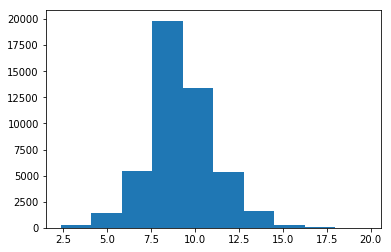

wetbulb_temperature 49328


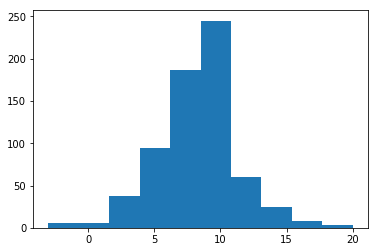

present_weather 48975


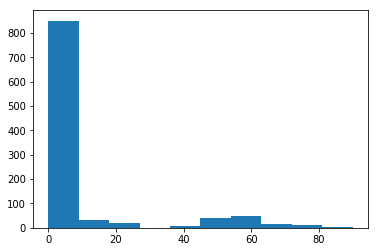

swell_height 36916


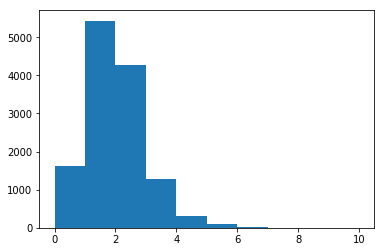

one_degree_box_number 0


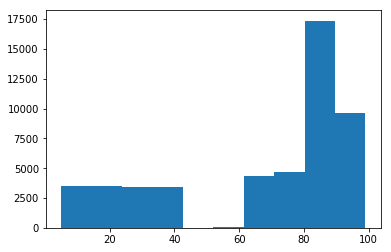

sea_level_pressure 92


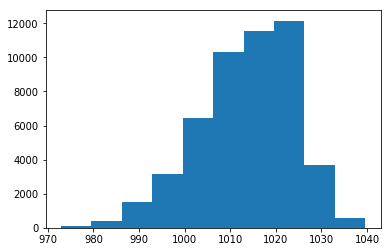

lower_cloud_amount 49021


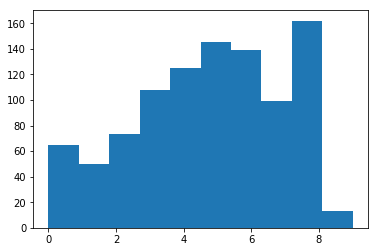

swell_period 36971


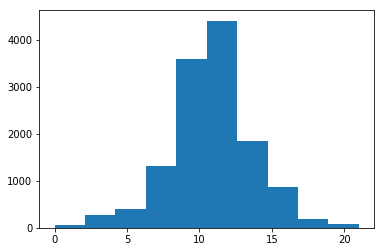

dewpoint_temperature 34871


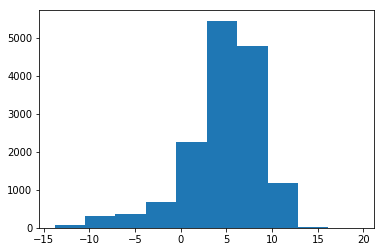

ship_speed 48792


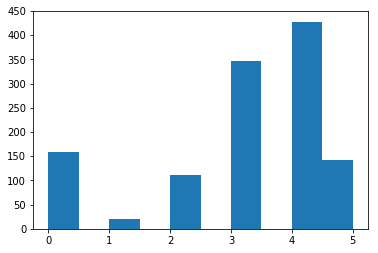

air_temperature 2109


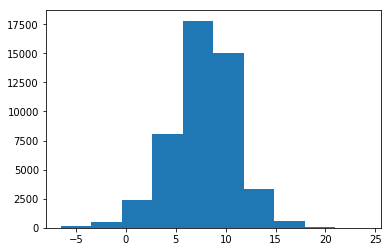

wave_period 2692


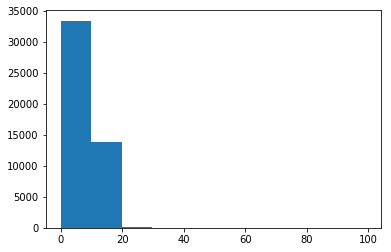

wind_speed 250


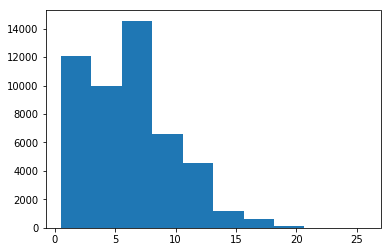

visibility 48781


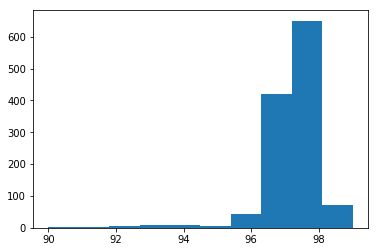

wind_direction_true 0


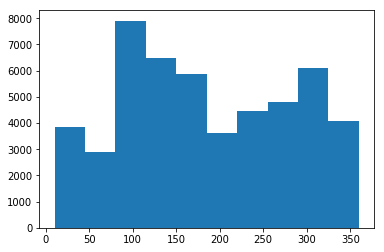

total_cloud_amount 48819


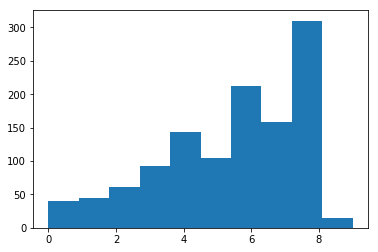

swell_direction 36896


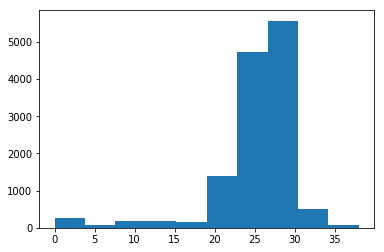

longitude 0


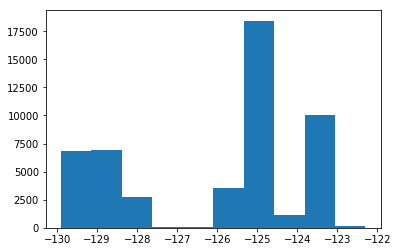

amt_pressure_tend 11382


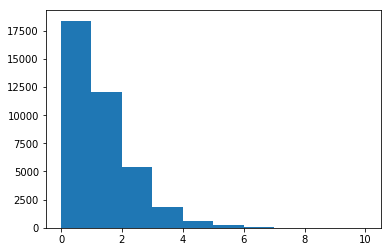

characteristic_of_ppp 11282


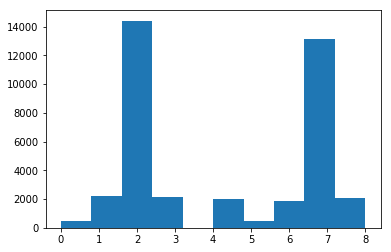

past_weather 48986


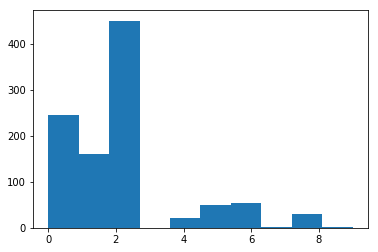

latitude 0


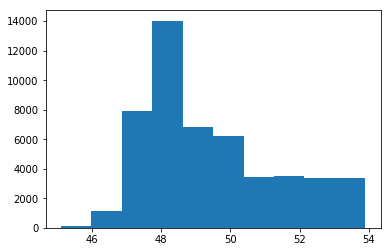

In [19]:
for col in cols:
    data = train[col].dropna()
    plt.hist(data)
    print(col ,train[col].isnull().sum() )
    plt.show()

In [83]:
columns_to_remove = ['year', 'imma_version','attm_count', 'time_indicator', 'latlong_indicator','national_source_indicator','id_indicator', 'wind_direction_indicator','wind_speed_indicator','indicator_for_temp','wbt_indicator','dpt_indicator','sst_measurement_method','deck','source_id','platform_type','dup_status','dup_check','source_exclusion_flags','release_no_primary','release_no_secondary','release_no_tertiary','release_status_indicator','intermediate_reject_flag']

In [84]:
cats_cols = ['nightday_flag', 'ten_degree_box_number','ship_course']

In [85]:
cols = list(set(cols) - set(columns_to_remove))

In [86]:
cols

['present_weather',
 'sea_level_pressure',
 'nightday_flag',
 'lower_cloud_amount',
 'dewpoint_temperature',
 'hour',
 'air_temperature',
 'ship_speed',
 'day',
 'wave_period',
 'ten_degree_box_number',
 'wind_speed',
 'visibility',
 'total_cloud_amount',
 'swell_direction',
 'longitude',
 'amt_pressure_tend',
 'ship_course',
 'latitude',
 'sea_surface_temp',
 'wetbulb_temperature',
 'swell_height',
 'one_degree_box_number',
 'month',
 'swell_period',
 'wind_direction_true',
 'characteristic_of_ppp',
 'past_weather']

In [56]:
!pip install catboost

You are using pip version 18.0, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [87]:
cat_index = []
for item in cats_cols:
    cat_index.append(cols.index(item))
cat_index.sort()

In [76]:
from catboost import CatBoostRegressor

In [88]:
X = train[cols]
y = train['wave_height']

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7, random_state=1234)

/home/ashutosh/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [90]:
model=CatBoostRegressor(iterations=50, depth=3, learning_rate=0.1, loss_function='RMSE')
model.fit(X_train, y_train,cat_features=cat_index,eval_set=(X_validation, y_validation),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 174.0677918	test: 172.3369547	best: 172.3369547 (0)	total: 433ms	remaining: 21.2s
1:	learn: 160.4543533	test: 158.6194270	best: 158.6194270 (1)	total: 473ms	remaining: 11.4s
2:	learn: 148.4461976	test: 146.5479492	best: 146.5479492 (2)	total: 510ms	remaining: 8s
3:	learn: 137.8430916	test: 135.8973501	best: 135.8973501 (3)	total: 556ms	remaining: 6.39s
4:	learn: 128.3813838	test: 126.3894723	best: 126.3894723 (4)	total: 588ms	remaining: 5.29s
5:	learn: 119.9925181	test: 117.9700160	best: 117.9700160 (5)	total: 617ms	remaining: 4.53s
6:	learn: 112.5505513	test: 110.5477346	best: 110.5477346 (6)	total: 653ms	remaining: 4.01s
7:	learn: 106.2102189	test: 104.2108246	best: 104.2108246 (7)	total: 687ms	remaining: 3.61s
8:	learn: 100.5878998	test: 98.5774518	best: 98.5774518 (8)	total: 726ms	remaining: 3.31s
9:	learn: 95.8893948	test: 93.9271669	best: 93.9271669 (9)	total: 771ms	remaining: 3.08s
10:	learn: 91.7382932	test: 89.7971654	best: 89.7971654 (10)	total: 816ms	remaining: 2.8

In [91]:
x_test = test[cols]

In [92]:
pred = model.predict(x_test)

In [93]:
sub = pd.read_csv('sample_sub.csv')

In [94]:
sub.columns

Index(['index', 'wave_height'], dtype='object')

In [95]:
sub['wave_height'] = pred

In [96]:
sub.to_csv('submission_ashu_2.csv',index = False)